<a href="https://colab.research.google.com/github/Harish-topper12/Deep_Learning_Assignment/blob/main/Deep_Learning_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Import Libraries

In [1]:
# Required imports

# For downloading financial data from Yahoo Finance
import yfinance as yf

# For numerical operations
import numpy as np

# For data manipulation
import pandas as pd

# TensorFlow for building and training neural network models
import tensorflow as tf

# For scaling data
from sklearn.preprocessing import MinMaxScaler

# For building neural network models
from tensorflow.keras.models import Sequential

# Various layers for neural network
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Flatten, Dropout

# For plotting graphs
import matplotlib.pyplot as plt

# For seasonal decomposition in time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# For Dickey-Fuller test to check stationarity
from statsmodels.tsa.stattools import adfuller

# For implementing early stopping in model training
from tensorflow.keras.callbacks import EarlyStopping

# Set random seeds for reproducibility

# Setting seed for NumPy operations to ensure reproducible results
np.random.seed(42)

# Setting seed for TensorFlow operations to ensure reproducible results
tf.random.set_seed(42)

import seaborn as sns

### Function to Load Stock Data

In [2]:
# Function to load stock data
def load_stock_data(stock_symbol, start_date, end_date):
    """
    Downloads stock data for a given symbol over a specified date range.

    Args:
        stock_symbol (str): The ticker symbol of the stock (e.g., 'AAPL' for Apple Inc.).
        start_date (str): The start date for the data in 'YYYY-MM-DD' format.
        end_date (str): The end date for the data in 'YYYY-MM-DD' format.

    Returns:
        pandas.DataFrame: DataFrame containing the stock data.
    """
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    return data

### Load Data and Initial Data Exploration for Apple and Microsoft For Stock Prediction

#### For Apple

In [3]:
# Load stock data for AAPL (Apple Inc.) from August 9, 2009, to January 1, 2020
data_aapl = load_stock_data('AAPL', '2009-08-09', '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Display the first few rows of the AAPL DataFrame
data_aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-08-10,5.916429,5.950000,5.845000,5.882857,4.986778,300294400
2009-08-11,5.846071,5.870714,5.781429,5.815357,4.929561,355342400
2009-08-12,5.805357,5.953929,5.802143,5.903929,5.004642,445071200
2009-08-13,5.951786,6.023929,5.946429,6.015000,5.098794,439980800
2009-08-14,5.997857,6.008214,5.911786,5.956429,5.049144,305816000


In [5]:
# Display information about the data_aapl DataFrame
data_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2617 entries, 2009-08-10 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2617 non-null   float64
 1   High       2617 non-null   float64
 2   Low        2617 non-null   float64
 3   Close      2617 non-null   float64
 4   Adj Close  2617 non-null   float64
 5   Volume     2617 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 143.1 KB


In [6]:
# Generate a summary of statistics for the data_aapl DataFrame
data_aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2.617000e+03
mean,26.775201,27.013059,26.532324,26.781291,24.586903,3.067610e+08
std,14.324000,14.449093,14.218236,14.344280,14.270921,2.359763e+08
min,5.772500,5.842500,5.693571,5.699643,4.831473,4.544800e+07
25%,15.271429,15.416429,15.121786,15.275714,13.161854,1.276640e+08
50%,24.260000,24.469999,24.022499,24.257500,21.954348,2.340504e+08
75%,36.380001,36.717499,36.152500,36.457500,34.216873,4.207868e+08
max,72.779999,73.492500,72.379997,73.412498,71.520821,1.880998e+09


#### For MSFT

In [7]:
# Load stock data for Microsoft (MSFT) from August 9, 2009, to January 1, 2020
data_msft = load_stock_data('MSFT', '2009-08-09', '2020-01-01')


[*********************100%%**********************]  1 of 1 completed


In [8]:
# Display the first few rows of the DataFrame containing Microsoft (MSFT) stock data
data_msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-08-10,23.459999,23.549999,23.299999,23.420000,17.586510,35261900
2009-08-11,23.320000,23.400000,23.049999,23.129999,17.368750,33615800
2009-08-12,23.129999,23.900000,23.030001,23.530001,17.669109,61972300
2009-08-13,23.629999,23.850000,23.400000,23.620001,17.736698,38954500
2009-08-14,23.620001,23.799999,23.510000,23.690001,17.789267,46330200


In [9]:
# Get information about the Microsoft (MSFT) stock data DataFrame, including data types and missing values
data_msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2617 entries, 2009-08-10 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2617 non-null   float64
 1   High       2617 non-null   float64
 2   Low        2617 non-null   float64
 3   Close      2617 non-null   float64
 4   Adj Close  2617 non-null   float64
 5   Volume     2617 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 143.1 KB


In [10]:
# Generate descriptive statistics for the Microsoft (MSFT) stock data DataFrame, including measures of central tendency and dispersion
data_msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2.617000e+03
mean,55.182564,55.634402,54.699733,55.196580,49.416297,4.038741e+07
std,33.690689,33.920903,33.391932,33.678880,33.763490,2.329266e+07
min,23.090000,23.320000,22.730000,23.010000,17.368750,7.425600e+06
25%,29.150000,29.440001,28.830000,29.160000,22.911602,2.461210e+07
50%,43.200001,43.590000,42.910000,43.290001,37.594326,3.495600e+07
75%,68.970001,69.489998,68.589996,69.080002,63.667210,5.030930e+07
max,159.449997,159.550003,158.220001,158.960007,153.179916,3.193179e+08


### Functions for Exploratory Data Analysis (EDA)

In [11]:
# Function to plot the closing price trends of a stock
def plot_stock_trends(data, stock_name):
    # Create a figure with specified dimensions
    plt.figure(figsize=(12, 6))

    # Plot the closing price of the stock
    plt.plot(data['Close'], label='Closing Price')

    # Set the title of the plot
    plt.title(f'{stock_name} Stock Closing Prices')

    # Set labels for the x and y axes
    plt.xlabel('Date')
    plt.ylabel('Price')

    # Display the legend to identify the plotted data
    plt.legend()

    # Show the plot
    plt.show()


In [12]:
# Function to plot the daily volatility (percentage change) of a stock
def plot_volatility(data, stock_name):
    # Calculate the daily percentage changes in closing price
    daily_changes = data['Close'].pct_change().dropna()

    # Create a figure with specified dimensions
    plt.figure(figsize=(12, 6))

    # Plot a histogram of the daily percentage changes
    sns.histplot(daily_changes, bins=50, kde=True)

    # Set the title of the plot
    plt.title(f'{stock_name} Daily Percentage Change (Volatility)')

    # Set labels for the x and y axes
    plt.xlabel('Percentage Change')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

In [13]:
# Function to plot the logarithmic returns of a stock over time
def plot_log_returns(data, stock_name):
    # Calculate the logarithmic returns
    data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))

    # Create a figure with specified dimensions
    plt.figure(figsize=(12, 6))

    # Plot the logarithmic returns
    plt.plot(data['Log_Returns'], label='Logarithmic Returns')

    # Set the title of the plot
    plt.title(f'{stock_name} Logarithmic Returns Over Time')

    # Set labels for the x and y axes
    plt.xlabel('Date')
    plt.ylabel('Log Return')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

In [14]:
# Function to plot the rolling volatility of a stock over time
def plot_rolling_volatility(data, stock_name):
    # Calculate the rolling volatility using a 21-day rolling window
    rolling_volatility = data['Log_Returns'].rolling(window=21).std() * np.sqrt(252)  # 21-day rolling window

    # Create a figure with specified dimensions
    plt.figure(figsize=(12, 6))

    # Plot the rolling volatility
    plt.plot(rolling_volatility, label='Rolling Volatility')

    # Set the title of the plot
    plt.title(f'{stock_name} 21-Day Rolling Volatility')

    # Set labels for the x and y axes
    plt.xlabel('Date')
    plt.ylabel('Volatility')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

In [15]:
# Function to plot stock prices along with 50-Day and 200-Day Moving Averages
def plot_moving_averages(data, stock_name):
    # Calculate the 50-Day Moving Average
    data['MA50'] = data['Close'].rolling(window=50).mean()

    # Calculate the 200-Day Moving Average
    data['MA200'] = data['Close'].rolling(window=200).mean()

    # Create a figure with specified dimensions
    plt.figure(figsize=(12, 6))

    # Plot the Closing Price
    plt.plot(data['Close'], label='Closing Price')

    # Plot the 50-Day Moving Average
    plt.plot(data['MA50'], label='50-Day MA')

    # Plot the 200-Day Moving Average
    plt.plot(data['MA200'], label='200-Day MA')

    # Set the title of the plot
    plt.title(f'{stock_name} Stock Prices with Moving Averages')

    # Set labels for the x and y axes
    plt.xlabel('Date')
    plt.ylabel('Price')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

In [16]:
# Function to plot the seasonal decomposition of stock prices
def plot_seasonal_decomposition(data, stock_name):
    # Perform seasonal decomposition using a multiplicative model and a yearly period of 365 days
    decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)

    # Create a figure with specified dimensions
    plt.figure(figsize=(14, 7))

    # Plot the observed component
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')

    # Plot the trend component
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')

    # Plot the seasonal component
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')

    # Plot the residual component
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')

    # Ensure tight layout of subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


In [17]:
# Function to perform Augmented Dickey-Fuller (ADF) test for stationarity
def perform_adf_test(data, stock_name):
    # Perform ADF test on the 'Close' prices
    adf_result = adfuller(data['Close'])

    # Print the ADF test statistic and p-value
    print(f'{stock_name} - ADF Test Statistic: {adf_result[0]}')
    print(f'{stock_name} - p-value: {adf_result[1]}')

    # Check if the p-value is greater than 0.05 (common significance level)
    if adf_result[1] > 0.05:
        print("The series is not stationary.")
    else:
        print("The series is stationary.")

In [18]:
# Function to plot Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for stock data
def plot_acf_pacf(data, stock_name):
    # Plot ACF with 50 lags
    plt.figure(figsize=(12, 4))
    plot_acf(data['Close'], lags=50, alpha=0.05)
    plt.title(f'Autocorrelation Function for {stock_name}')
    plt.show()

    # Plot PACF with 50 lags
    plt.figure(figsize=(12, 4))
    plot_pacf(data['Close'], lags=50, alpha=0.05)
    plt.title(f'Partial Autocorrelation Function for {stock_name}')
    plt.show()

In [19]:
def plot_correlation_heatmap(data, stock_name):
    # Create a figure with a size of 10x8 inches
    plt.figure(figsize=(10, 8))

    # Generate a correlation heatmap with annotations, using the 'coolwarm' colormap and formatting values with 2 decimal places
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

    # Set the title of the heatmap indicating the stock name
    plt.title(f'{stock_name} Correlation Heatmap')

    # Display the heatmap
    plt.show()

### Function to Create Dataset

In [20]:
def create_dataset(dataset, time_step):
    """
    Creates a dataset for time series forecasting.

    This function generates sequences of a specified length (time_step) from the dataset,
    where each sequence is used to predict the next value in the time series.

    Args:
        dataset (numpy.ndarray): The time series dataset.
        time_step (int): The number of time steps to include in each sequence.

    Returns:
        tuple: Two numpy arrays, X and Y, where X is the sequence of data and Y is the label for each sequence.
    """
    X, Y = [], []
    # Loop over the dataset to create sequences (X) and labels (Y)
    for i in range(len(dataset) - time_step - 1):
        # Append the sequence of data to X
        X.append(dataset[i:(i + time_step), 0])
        # Append the label (next value in the sequence) to Y
        Y.append(dataset[i + time_step, 0])
    # Convert lists to numpy arrays
    return np.array(X), np.array(Y)

### Function for Data Preprocessing

In [21]:
def preprocess_data(close_prices, time_step, scaler=None):
    """
    Preprocesses the stock price data.

    Args:
        close_prices (numpy.ndarray): Array of closing prices of the stock.
        time_step (int): The number of time steps to include in each sequence.
        scaler (MinMaxScaler, optional): Scaler for data normalization.
                                         If None, a new scaler will be created and fitted.

    Returns:
        tuple: Preprocessed training, validation, and testing datasets (X and y),
               and the scaler used for data normalization.
    """

    # Splitting the data into training, validation, and testing sets
    train_size = int(len(close_prices) * 0.7)
    val_size = int(len(close_prices) * 0.15)
    train_data = close_prices[:train_size]
    val_data = close_prices[train_size:train_size + val_size]
    test_data = close_prices[train_size + val_size:]

    # Scaling the data
    if scaler is None:
        # If no scaler is provided, create a new one and fit it to the training data
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_data_scaled = scaler.fit_transform(train_data)
    else:
        # If a scaler is provided, use it to transform the data
        train_data_scaled = scaler.transform(train_data)

    val_data_scaled = scaler.transform(val_data)
    test_data_scaled = scaler.transform(test_data)

    # Creating sequences for model training
    X_train, y_train = create_dataset(train_data_scaled, time_step)
    X_val, y_val = create_dataset(val_data_scaled, time_step)
    X_test, y_test = create_dataset(test_data_scaled, time_step)

    # Reshaping input for LSTM
    # LSTM expects input to be in the form of [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    return X_train, y_train, X_val, y_val, X_test, y_test, scaler

### Functions to build Models

In [22]:
# Function to build a baseline neural network model
def build_baseline_model(input_shape, neurons, dropout_rate, recurrent_dropout=None):
    # Create a sequential model
    model = Sequential([
        # Flatten the input data
        Flatten(input_shape=input_shape),

        # Add a dense layer with ReLU activation
        Dense(neurons, activation='relu'),

        # Add dropout regularization
        Dropout(dropout_rate),

        # Add a final dense layer with 1 output neuron
        Dense(1)
    ])

    # Return the constructed model
    return model

In [23]:
# Function to build an RNN (Recurrent Neural Network) model
def build_rnn_model(input_shape, neurons, dropout_rate, recurrent_dropout):
    # Create a sequential model
    model = Sequential([
        # Add the first SimpleRNN layer with specified neurons, returning sequences
        SimpleRNN(neurons, return_sequences=True, input_shape=input_shape, dropout=dropout_rate, recurrent_dropout=recurrent_dropout),

        # Add the second SimpleRNN layer with specified neurons
        SimpleRNN(neurons, dropout=dropout_rate, recurrent_dropout=recurrent_dropout + 0.1),

        # Add a final dense layer with 1 output neuron
        Dense(1)
    ])

    # Return the constructed model
    return model

In [24]:
# Function to build an LSTM (Long Short-Term Memory) model
def build_lstm_model(input_shape, neurons, dropout_rate, recurrent_dropout):
    # Create a sequential model
    model = Sequential([
        # Add the first LSTM layer with specified neurons, returning sequences
        LSTM(neurons, return_sequences=True, input_shape=input_shape, dropout=dropout_rate, recurrent_dropout=recurrent_dropout),

        # Add the second LSTM layer with specified neurons
        LSTM(neurons, dropout=dropout_rate, recurrent_dropout=recurrent_dropout + 0.1),

        # Add a final dense layer with 1 output neuron
        Dense(1)
    ])

    # Return the constructed model
    return model

### Function to Train and Evaluate Models

In [25]:
# Function to train and evaluate a given model
def train_and_evaluate(model_builder, neurons, dropout_rate, recurrent_dropout, X_train, y_train, X_val, y_val):
    # Build the model using the provided model_builder function
    model = model_builder((X_train.shape[1], 1), neurons, dropout_rate, recurrent_dropout)

    # Compile the model with Adam optimizer and mean squared error (MSE) loss
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

    # Define early stopping to prevent overfitting and restore the best weights
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model on the training data, using validation data for early stopping
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, callbacks=[early_stopping])

    # Return the trained model and training history
    return model, history

### Function to Plot Training and Validation Loss Curves

In [26]:
# Function to plot training and validation loss curves
def plot_loss_curves(history, model_name, title):
    # Create a figure for the plot
    plt.figure(figsize=(10, 5))

    # Plot the training loss curve
    plt.plot(history.history['loss'], label='Training Loss')

    # Plot the validation loss curve
    plt.plot(history.history['val_loss'], label='Validation Loss')

    # Set the title of the plot
    plt.title(f"{title}" )

    # Label the x-axis
    plt.xlabel('Epochs')

    # Label the y-axis
    plt.ylabel('Loss')

    # Add a legend to the plot
    plt.legend()

    # Show the plot
    plt.show()


### Function for Test and Future Prediction Plotting

In [27]:
def plot_test_and_future_predictions(best_timestamps, stock, model_name, future_steps=30):
    # Extract model details
    time_step, model_instance, history, X_train, y_train, X_val, y_val, X_test, y_test, scaler = best_timestamps[(stock, model_name)]

    # Combine the training and validation data for retraining
    X_train_val = np.concatenate((X_train, X_val), axis=0)
    y_train_val = np.concatenate((y_train, y_val), axis=0)

    # Retrain the model on the combined training and validation dataset
    model_instance.fit(X_train_val, y_train_val, epochs=len(history.history['loss']), batch_size=64, verbose=0)

    # Predictions for the test dataset
    test_predictions = model_instance.predict(X_test)

    # Inverse transform the predictions and actuals
    test_predictions_inv = scaler.inverse_transform(test_predictions)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Future predictions
    last_sequence = X_test[-1, :, :]
    future_predictions = []
    for _ in range(future_steps):
        last_sequence_pred = model_instance.predict(last_sequence.reshape(1, time_step, 1))
        future_predictions.append(last_sequence_pred[0, 0])
        last_sequence = np.roll(last_sequence, -1, axis=0)
        last_sequence[-1] = last_sequence_pred

    future_predictions_scaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Plotting
    plt.figure(figsize=(14, 7))

    # Calculate the x-axis indices for the test set
    test_indices = range(len(y_test_inv))

    # Test predictions
    plt.plot(test_indices, y_test_inv.flatten(), label='Test Actual')
    plt.plot(test_indices, test_predictions_inv.flatten(), label='Test Predictions')

    # Future predictions should start exactly where the test predictions end
    future_indices = range(max(test_indices) + 1, max(test_indices) + 1 + len(future_predictions_scaled))
    plt.plot(future_indices, future_predictions_scaled.flatten(), label='Future Predictions', linestyle='--')

    plt.title(f"{stock} - {model_name} Model Test Predictions and Future Forecast")
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


### Function to Evaluate Models with Best Timestamp

In [28]:
def evaluate_models_with_best_timestamp(stocks, start_date, end_date, timestamps):
    # Initialize dictionaries to store performance records and best timestamps
    performance_records = {}
    best_performance = {}  # Dictionary to store the best performance (MSE and MAE) for each model and stock

    # Iterate over each stock
    for stock in stocks:
        print(f"\nEvaluating models for {stock}")

        # Download stock data for the given date range and reshape it
        data = yf.download(stock, start=start_date, end=end_date)['Close'].values.reshape(-1,1)


       # Retrieve model configuration settings (neurons, dropout rates) for the current stock
        neurons = configurations[stock]['neurons']
        dropout_rate = configurations[stock]['dropout_rate']
        recurrent_dropout = configurations[stock]['recurrent_dropout']

        # Initialize a dictionary to track the best performance for each model
        best_performance_per_model = {
            "Baseline": {"mse": float('inf'), "mae": float('inf')},
            "RNN": {"mse": float('inf'), "mae": float('inf')},
            "LSTM": {"mse": float('inf'), "mae": float('inf')}
        }

        # Iterate over each time step
        for time_step in timestamps:
            print(f"\nProcessing time step: {time_step}")

            # Preprocess data for the current time step
            processed_data = preprocess_data(data, time_step)
            if processed_data is None:
                print(f"Preprocessing failed for {stock} at time_step {time_step}")
                continue

            # Unpack preprocessed data
            X_train, y_train, X_val, y_val, X_test, y_test, scaler = processed_data

            # Iterate over each model
            for model_name, model_builder in [("Baseline", build_baseline_model),
                                              ("RNN", build_rnn_model),
                                              ("LSTM", build_lstm_model)]:
                print(f"\nTraining {model_name} model with {neurons} neurons and {dropout_rate} dropout rate for time stamp {time_step}")

                # Train and evaluate the model
                model, history = train_and_evaluate(model_builder, neurons, dropout_rate, recurrent_dropout, X_train, y_train, X_val, y_val)

                # Retrieve MSE and MAE from the model's history
                mse = history.history['val_mse'][-1]
                mae = history.history['val_mae'][-1]

                # Record performance metrics for the current model and time step
                performance_records.setdefault((stock, time_step), {})[model_name] = {'mse': mse, 'mae': mae}

                # Update best performance for the model if current MSE and MAE are lower
                if mse < best_performance_per_model[model_name]["mse"] and mae < best_performance_per_model[model_name]["mae"]:
                    best_performance_per_model[model_name] = {"mse": mse, "mae": mae}
                    best_performance[(stock, model_name)] = (time_step, model, history, X_train, y_train, X_val, y_val, X_test, y_test, scaler)

                print(f"Completed: {model_name} - MSE: {mse}, MAE: {mae}")

        # Print the best performance for each model for the current stock
        print(f"\nBest Performance for {stock}:")
        for model in ["Baseline", "RNN", "LSTM"]:
            if (stock, model) in best_performance:
                best_time_step, _, _, _, _, _, _, _, _, _ = best_performance[(stock, model)]
                best_mse = best_performance_per_model[model]["mse"]
                best_mae = best_performance_per_model[model]["mae"]
                print(f"{model}: Time Step {best_time_step} - MSE: {best_mse}, MAE: {best_mae}")

    # Return the performance records and best performance
    return performance_records, best_performance


### Function for Tabular Comparison of Models

In [29]:
# Function to generate separate tabular comparisons of model performance for MSE and MAE
def tabular_comparison(best_timestamps):
    # Initialize lists to store data for the tables
    mse_table_data = []
    mae_table_data = []

    # Iterate over each model's best timestamp data stored in best_timestamps
    for (stock, model), details in best_timestamps.items():
        # Extract details from the best_timestamps dictionary
        time_step, model_instance, history, X_train, y_train, X_val, y_val, X_test, y_test, _ = details

        # Evaluate the model on the training dataset and get training MSE and MAE
        train_mse = model_instance.evaluate(X_train, y_train, verbose=0)[1]
        train_mae = model_instance.evaluate(X_train, y_train, verbose=0)[2]

        # Retrieve the MSE and MAE on the validation dataset from the model's training history
        val_mse = history.history['val_mse'][-1]
        val_mae = history.history['val_mae'][-1]

        # Evaluate the model on the test dataset and get testing MSE and MAE
        test_mse = model_instance.evaluate(X_test, y_test, verbose=0)[1]
        test_mae = model_instance.evaluate(X_test, y_test, verbose=0)[2]

        # Append the performance metrics along with stock, model, and timestamp info to the lists
        mse_table_data.append([stock, model, time_step, train_mse, val_mse, test_mse])
        mae_table_data.append([stock, model, time_step, train_mae, val_mae, test_mae])

    # Create DataFrames from the collected data for easy visualization and comparison
    mse_comparison_df = pd.DataFrame(mse_table_data, columns=["Stock", "Model", "Timestamp", "Train MSE", "Validation MSE", "Test MSE"])
    mae_comparison_df = pd.DataFrame(mae_table_data, columns=["Stock", "Model", "Timestamp", "Train MAE", "Validation MAE", "Test MAE"])

    # Return the DataFrames for both MSE and MAE
    return mse_comparison_df, mae_comparison_df

In [30]:
# Define the neuron and dropout configurations for each stock
configurations = {
    'AAPL': {'neurons': 64, 'dropout_rate': 0, 'recurrent_dropout': 0},
    'MSFT': {'neurons': 64, 'dropout_rate': 0, 'recurrent_dropout': 0}
}

### EDA for Apple and Microsoft

#### Plot Stock Trends for Apple and Microsoft Company

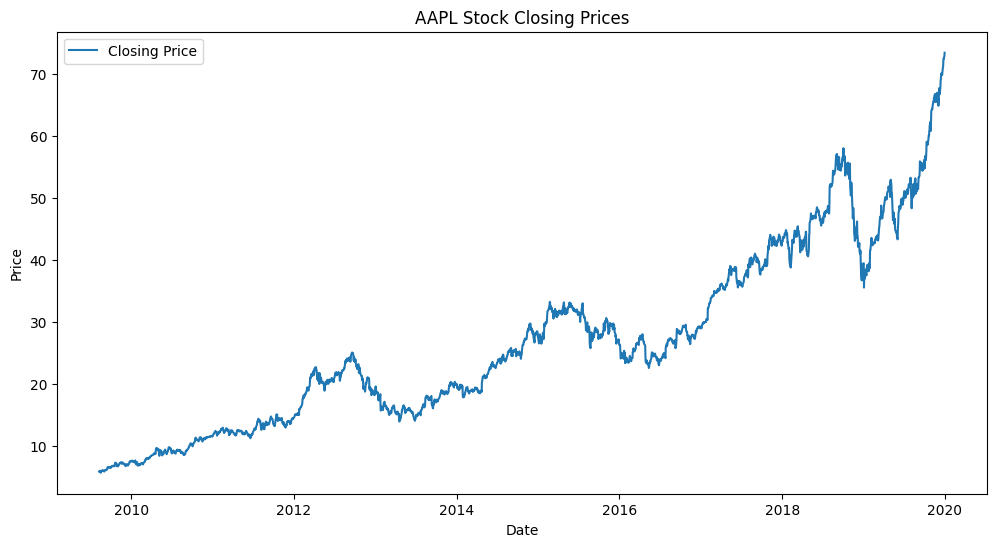

In [31]:
# Plot AAPL stock closing price trends
plot_stock_trends(data_aapl, 'AAPL')

##### Observations:
The stock price shows a general upward trend, indicating an increase in the value of Apple's stock over the years shown. There are fluctuations evident in the graph, as is typical with stock prices, with periods of both rise and decline.

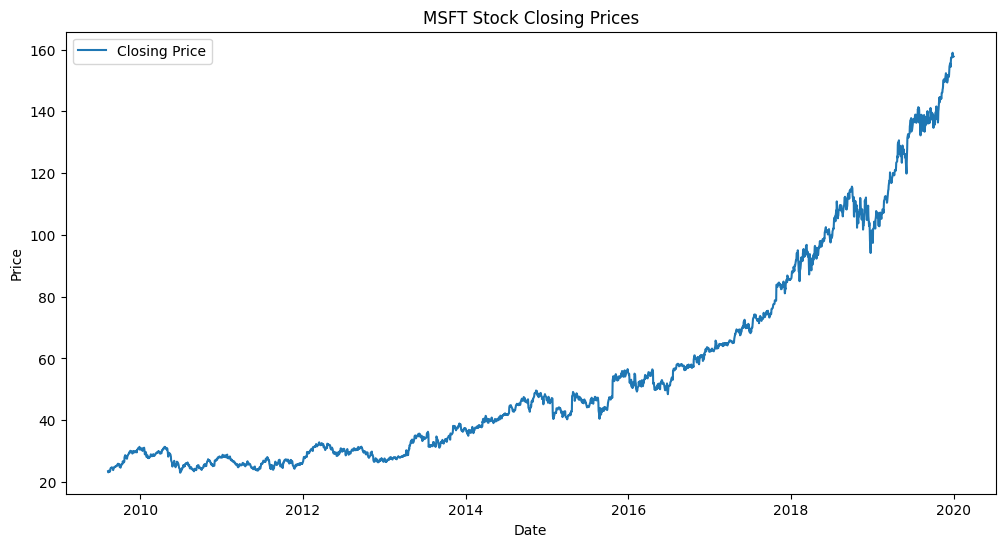

In [32]:
# Plot MSFT (Microsoft) stock closing price trends
plot_stock_trends(data_msft, 'MSFT')

#### Observations from above:
The stock price shows a more pronounced rise around 2016, continuing to escalate sharply through to 2020. The overall pattern suggests a strong positive performance, potentially reflecting Microsoft's successful business strategies, product launches, and market positioning during this period

#### Plot Volatility for Apple and Microsoft

Purpose of doing this step is to assess Normality, Understand Volatility, Identify Outliers, and Evaluate Skewness and Kurtosis.

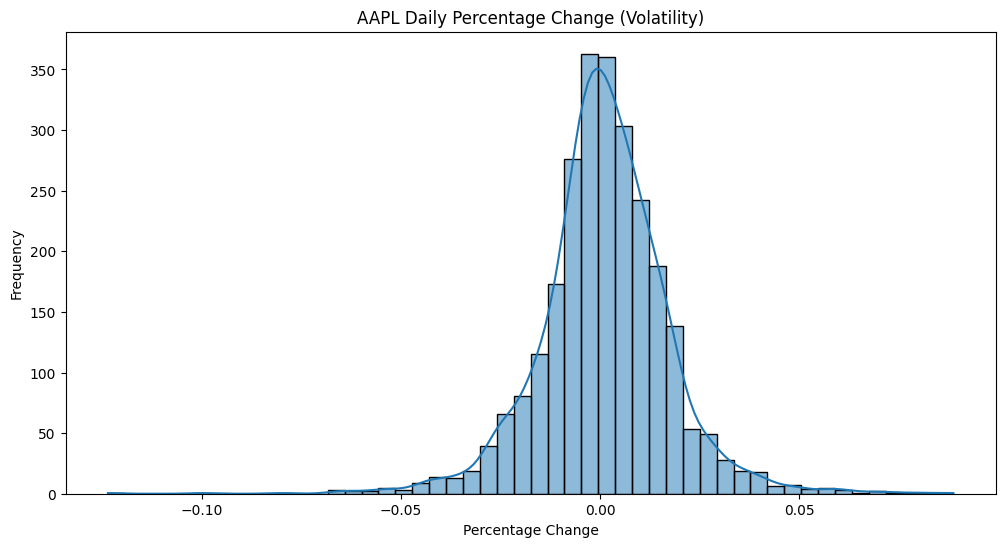

In [33]:
# Plot volatility (daily percentage change) for AAPL (Apple Inc.) stock
plot_volatility(data_aapl, 'AAPL')

#### key Observations:
1. **Central Tendency:** The data peaks around 0, indicating that most days did not see a significant percentage change in the stock price. This is typical for large, established companies.

2. **Symmetry:** The distribution looks roughly symmetrical about the center, suggesting that positive and negative percentage changes occurred with similar frequency.

3. **Volatility:** The width of the distribution gives a sense of volatility. A narrow peak suggests lower volatility, while a wider distribution would indicate higher volatility.

4. **Outliers:** There do not seem to be significant outliers, as the tails on both ends of the distribution taper off quickly, which means there were few days with extremely large changes in stock price.

5. **Normality:** The shape of the distribution appears to be somewhat normal (bell-shaped), which could imply that the daily percentage changes of AAPL stock are random and independent of each other, a key assumption in some financial models.

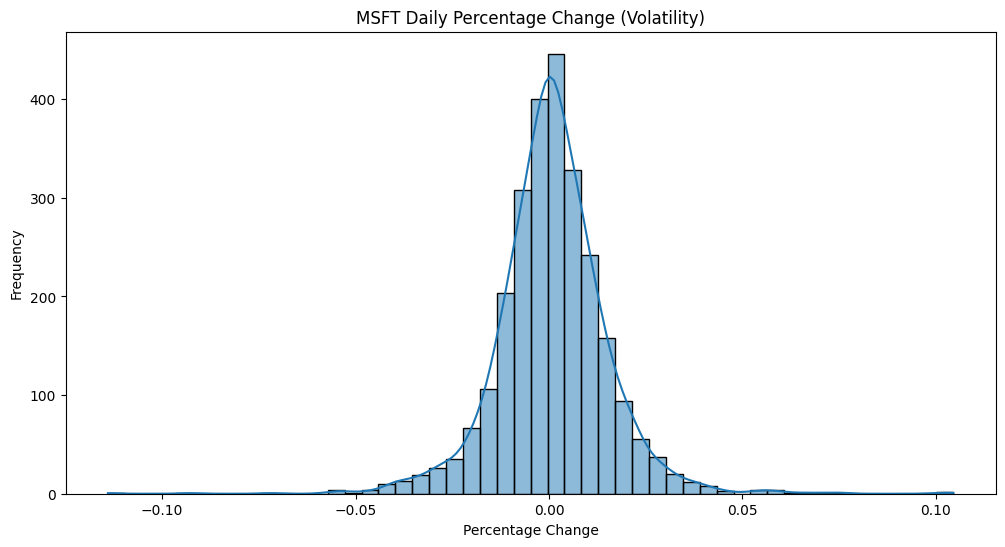

In [34]:
# Plot volatility (daily percentage change) for MSFT (Microsoft Corporation) stock
plot_volatility(data_msft, 'MSFT')

#### Key Observations:

1. **Central Tendency:** Most changes are close to 0, indicating days with little to no change in the stock price dominate the dataset.

2. **Symmetry:** The distribution is symmetrical around the center, suggesting an equal likelihood of positive and negative daily price changes.

3. **Volatility:** The spread of the distribution shows the variability in daily price changes. A narrower spread would indicate lower volatility, whereas a wider spread would indicate higher volatility.

4. **Outliers:** There are no significant tails indicating extreme values, which suggests that large fluctuations in daily price changes were rare during the observed period.

5. **Normality:** The shape of the distribution resembles a normal distribution, indicating that the daily percentage changes could be random and may follow a Gaussian distribution, which is a common assumption in many financial models for price changes.

#### Plot Log Returns for Apple and Microsoft

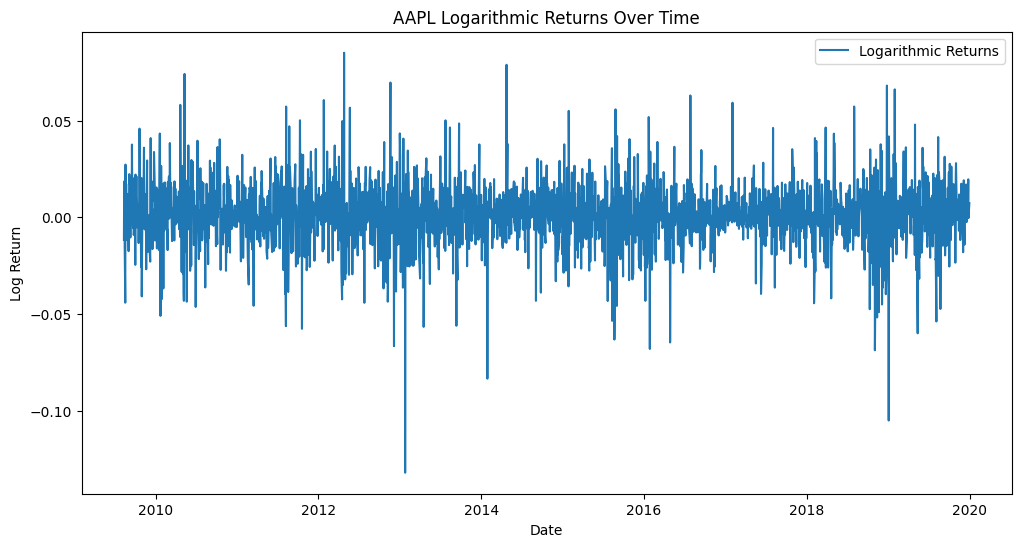

In [35]:
# Plot logarithmic returns for AAPL (Apple Inc.) stock
plot_log_returns(data_aapl, 'AAPL')

#### Purpose:
Logarithmic returns are often used in financial analysis because they are time additive and can be used to compare returns over different time periods.

#### Key Observations:
   
1. **Variability:** The returns fluctuate above and below the zero line, indicating periods of positive and negative returns.

2. **Volatility:** The length of the spikes represents the magnitude of the returns, with longer spikes indicating days with higher price changes. There are notable spikes, both positive and negative, suggesting days with significant price movement.

3. **Trend Analysis:** There doesn’t appear to be a clear long-term trend in the logarithmic returns from this visual alone, which is typical because returns are often considered to be random day-to-day.

4. **Potential Outliers:** The presence of extreme values, especially noticeable spikes far from the zero line, could be outliers indicating days with exceptionally high returns or losses.

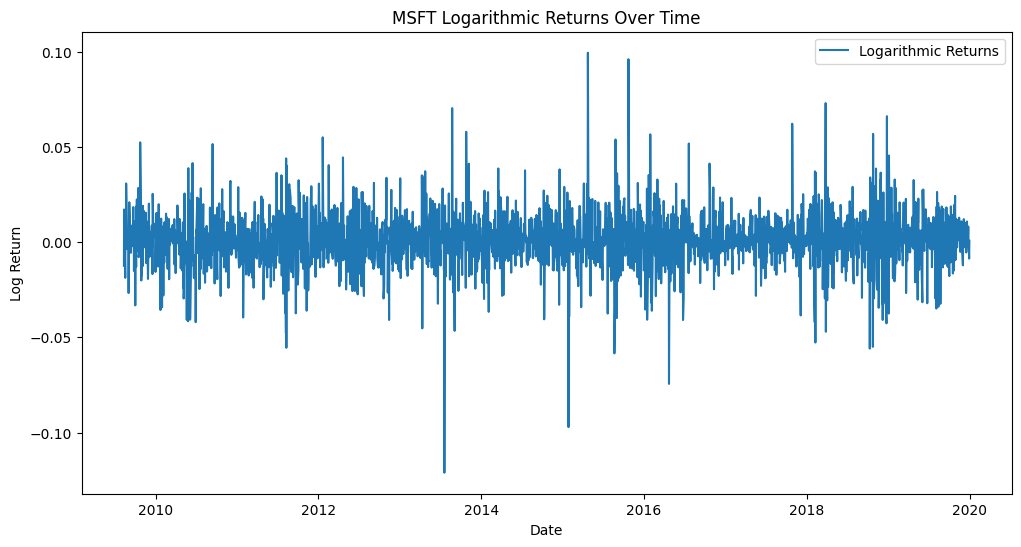

In [36]:
# Plot logarithmic returns for MSFT (Microsoft Corporation) stock
plot_log_returns(data_msft, 'MSFT')

#### Key Observations:
1. **Fluctuations:** There are noticeable fluctuations in the logarithmic returns, with values oscillating above and below the zero line, indicating periods of gains and losses in the stock price.

2. **Volatility:** The extent of these fluctuations gives an indication of the stock's volatility. Here, the length of the spikes represents the magnitude of the returns, with some periods showing greater volatility.

3. **Trend:** No discernible long-term upward or downward trend in returns is visible, which is typical for daily returns as they are generally considered to be random.

4. **Extreme Movements:** Spikes and sharp drops represent days with significant price movements, which might be associated with market events, earnings reports, or other news.

5. **Comparison with Normality:** The logarithmic returns seem to center around zero, which is common for log returns, but a thorough statistical analysis would be required to determine if they follow a normal distribution.

#### Plot Rolling volatility

##### Purpose:
Rolling volatility is commonly used in financial analysis to understand how much the price of an asset varies in a given time frame and is often calculated as the standard deviation of the logarithmic returns.

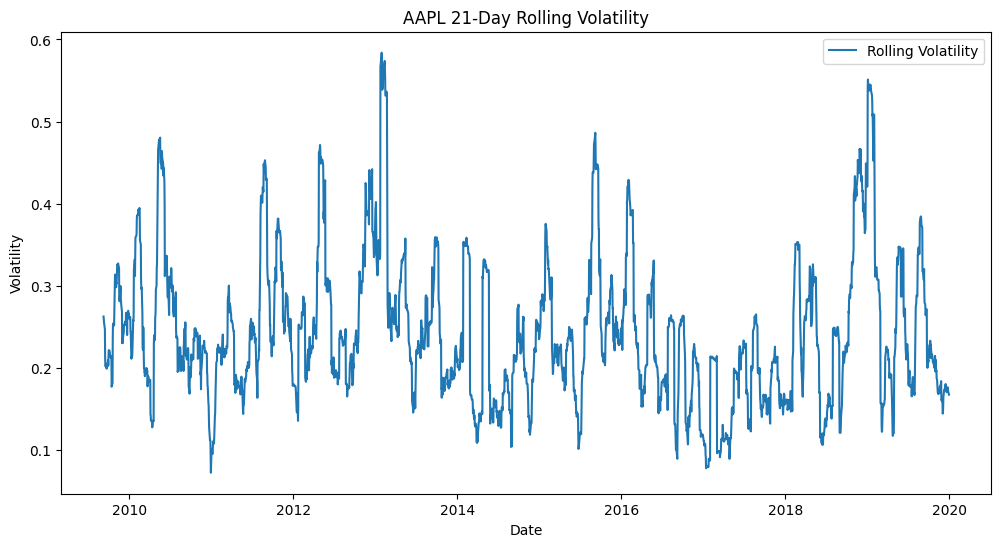

In [37]:
# Plot rolling volatility for AAPL (Apple Inc.) stock
plot_rolling_volatility(data_aapl, 'AAPL')

####  Key Observations:

1. **Fluctuating Volatility:** The volatility of AAPL stock is not constant; it fluctuates over time, showing periods of both low and high volatility.

2. **Periodic Spikes:** There are noticeable spikes in volatility at certain intervals. These spikes could be associated with market events, earnings reports, product announcements, or other news specific to Apple or the broader stock market.

3. **Volatility Clustering:** The chart exhibits a pattern known as volatility clustering—a tendency for periods of high volatility to be followed by high volatility and for low volatility periods to be followed by low volatility.

4. **Long-Term Trends:** Over the decade-long period shown in the chart, there does not appear to be a long-term upward or downward trend in volatility, but rather cyclical patterns that repeat over time.

5. **Recent Increase in Volatility:** Towards the end of the observed period, there is a significant rise in volatility. This suggests a period of heightened uncertainty or variation in the stock price, which may warrant further investigation to understand the underlying causes.

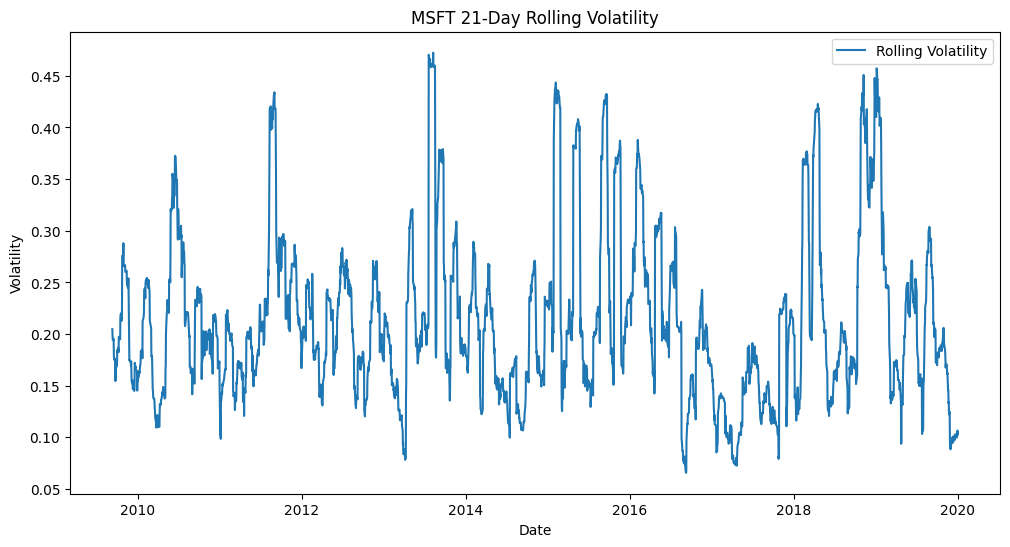

In [38]:
# Plot rolling volatility for MSFT (Microsoft Corporation) stock
plot_rolling_volatility(data_msft, 'MSFT')

#### Key Observations:

1. **Volatility Range:** The volatility of MSFT stock has varied, generally staying within a range, with a floor around 0.1 and reaching up to just under 0.5 at the highest peaks.

2. **Spike Patterns:** Similar to the AAPL volatility chart, there are spikes in volatility at various points in time. These could correspond to financial events, product announcements, market uncertainties, or other news that would impact Microsoft's stock price.

3. **Volatility Clustering:** This chart also shows evidence of volatility clustering, where periods of high volatility are often followed by more high volatility, suggesting that volatility in MSFT stock is not random but exhibits persistence over time.

**Comparison with AAPL:** Compared to the earlier AAPL volatility chart, the MSFT chart shows different patterns and magnitudes of volatility, which might indicate different market behaviors or company-specific risk profiles.

**End of Period Volatility:** Towards the end of the chart, there seems to be a notable increase in volatility, similar to the AAPL chart. This could be due to market-wide events affecting the technology sector or specific events related to Microsoft

#### Plot moving averages

Purpose of including moving averages is to smooth out price data to identify the trend direction and provide a clearer picture of the price movement over time without the short-term **fluctuations**

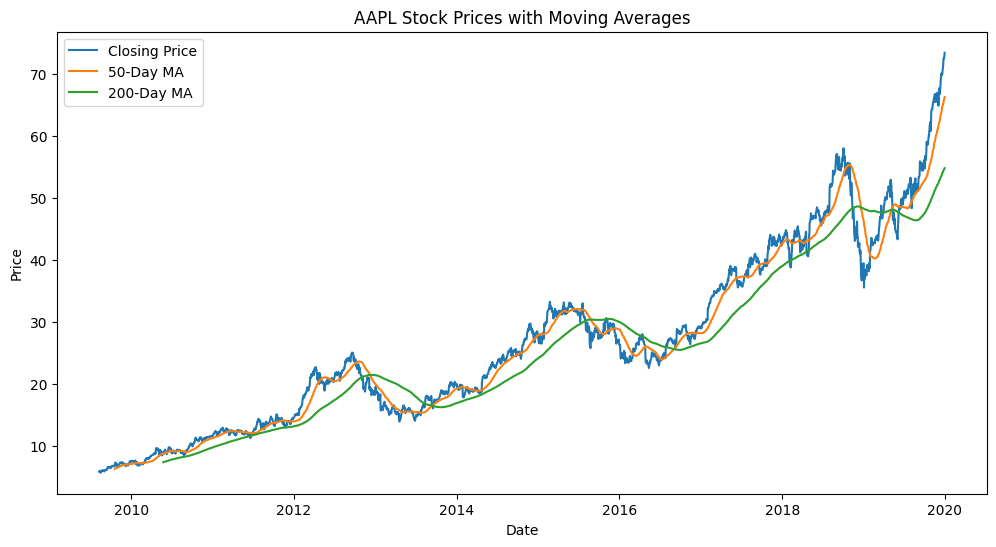

In [39]:
# Plot moving averages for AAPL (Apple Inc.) stock
plot_moving_averages(data_aapl, 'AAPL')

#### Key Observations:

1. **Trend Identification:** Both the 50-day and 200-day MAs show the trend of the stock. When the stock price is above the moving averages, it indicates a general uptrend, and when it is below, it indicates a downtrend.

2. **Signal for Traders:** Moving averages are often used as signals for entering or exiting trades. For instance, when the 50-day MA crosses above the 200-day MA, it's often considered a "golden cross," a bullish signal. Conversely, if the 50-day MA crosses below the 200-day MA, it is known as a "death cross," a bearish signal.

3. **Support and Resistance Levels:** Traders often consider moving averages as potential support or resistance levels. If the price bounces off the moving average, it can act as support; if it falls through, the moving average may act as resistance.

4. **Long-term vs. Short-term Trends:** The 200-day MA reflects the long-term trend, while the 50-day MA is more responsive to recent price changes, reflecting short-term trends.

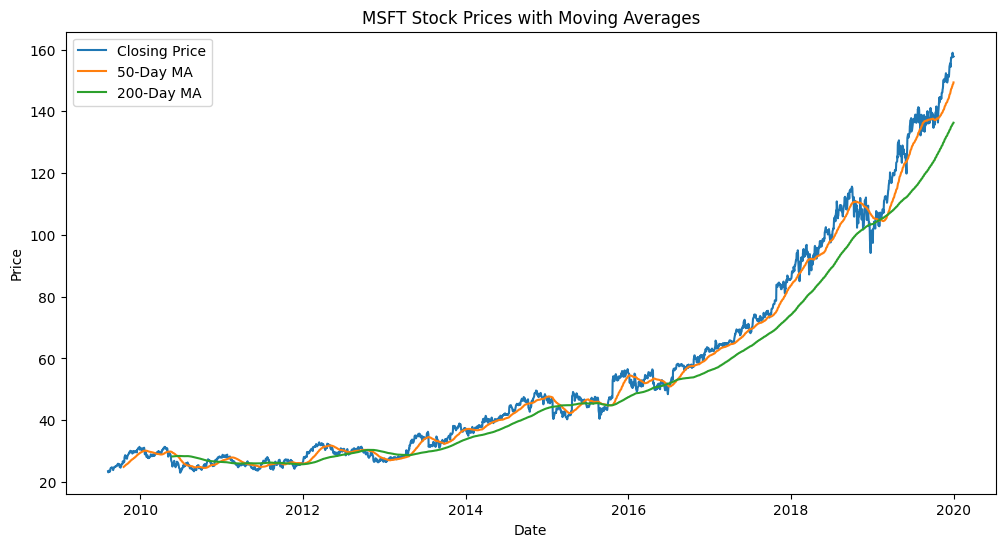

In [40]:
# Plot moving averages for MSFT (Microsoft Corporation) stock
plot_moving_averages(data_msft, 'MSFT')

#### Key Observations:

1. **Uptrend:** Both the 50-day and 200-day moving averages show a general upward trend, suggesting that Microsoft's stock price has been increasing over the period displayed.

2. **Moving Averages as Indicators:** The 50-day MA (short-term trend) is above the 200-day MA (long-term trend) for most of the chart, which is typically considered a bullish signal.

3. **Support Levels:** The moving averages often act as support levels where the price tends to bounce upward after touching these lines.

4. **Crossovers:** Any crossover between the two MAs can be considered a trading signal, with the 50-day crossing above the 200-day being bullish (golden cross) and below being bearish (death cross)

#### Perform seasonal decomposition analysis

#### Purpose:
Purpose of this seasonal decomposition is to understand the underlying patterns and structures in time series data. For stock prices, this can help in identifying not just the overall direction or trend of the stock, but also any seasonal effects that occur at regular intervals, such as quarterly financial reports or seasonal buying patterns.

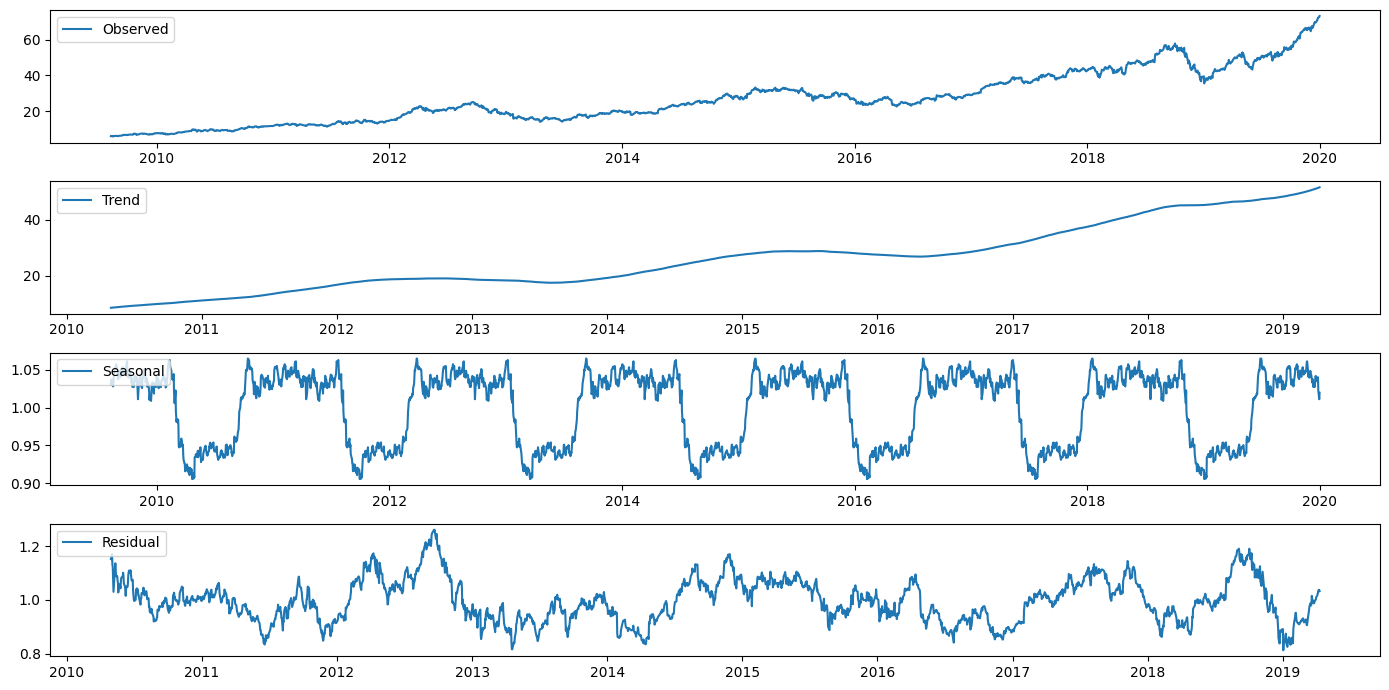

In [41]:
# Visualize seasonal decomposition for AAPL (Apple Inc.) stock
plot_seasonal_decomposition(data_aapl, 'AAPL')

#### Key Observations:

1. **Trend Component:** The Trend component of the MSFT stock price analysis reveals a clear upward trajectory. This upward trend indicates that over the period under review, Microsoft's stock price has been generally increasing. This could reflect the company's growth, success in new product areas, or overall positive market conditions benefiting the tech sector.

2. **Seasonal Component:** Upon examining the Seasonal component of the data, there is no distinct repeating pattern apparent. The absence of a strong seasonal cycle in the data suggests that MSFT's stock price is not significantly influenced by seasonal factors, or any possible seasonal effects are overshadowed by more dominant, non-seasonal factors.
Residual Component

3. **Residual component:** It presents the noise and irregular components of the stock price that are not explained by either trend or seasonality. The residuals appear to hover around the value of 1.0, implying a lack of strong patterns or systematic deviations once the trend and seasonal components have been removed from the analysis. This indicates that the residuals are relatively random and do not detract significantly from the overall trend and seasonal analysis.

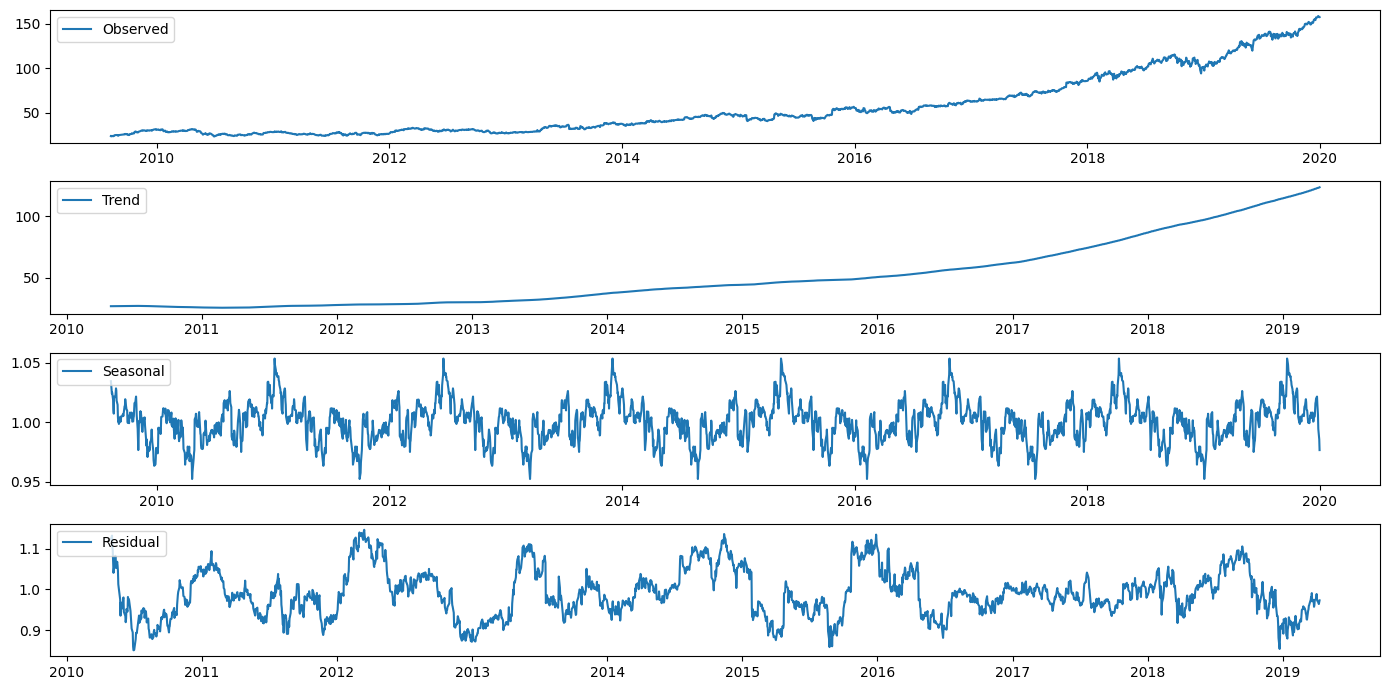

In [42]:
plot_seasonal_decomposition(data_msft, 'MSFT')

#### Key Observations:
1. **Trend Component:** This represents the long-term progression of the series, smoothing out the finer fluctuations to show the underlying direction and speed of the data changes over time. The trend component for MSFT shows a consistent upward trajectory, indicating growth in the stock value over the years.

2. **Seasonal Component:** This captures the regular, periodic fluctuations in the time series data that can be attributed to seasonal patterns. The seasonal component in the MSFT data does not show a clear, repeating seasonal effect, which might be expected as stock prices are often influenced more by market conditions and company performance than by the time of year.

3. **Residual Component:** These are the irregularities or 'noise' that cannot be explained by the trend or seasonal components. They may include random or irregular influences, which do not follow a predictable pattern. In the MSFT data, the residuals seem to fluctuate around 1.0 without any apparent pattern, indicating the removal of most trends and seasonal effects.

#### Perform the Augmented Dickey-Fuller test

In [43]:
# Perform Augmented Dickey-Fuller (ADF) Test for AAPL stock
perform_adf_test(data_aapl, 'AAPL')

AAPL - ADF Test Statistic: 1.0545084491575274
AAPL - p-value: 0.9948090442653157
The series is not stationary.


In [44]:
# Perform Augmented Dickey-Fuller (ADF) Test for MSFT stock
perform_adf_test(data_msft, 'MSFT')

MSFT - ADF Test Statistic: 4.032951676963924
MSFT - p-value: 1.0
The series is not stationary.


#### Plot Autocorrelation and Partial Autocorrelation Functions

##### Purpose:

1. **Autocorrelation Function (ACF):**

This plot shows the correlation of the stock's returns with its own lagged values. The ACF is used to identify any autocorrelation in the data, which means how the data points at a particular time are correlated with its own previous values.

The ACF plot here displays a series of vertical bars, each representing the correlation coefficient for a specific lag. The correlation values at different lags can help identify whether there is a pattern or cycle in the time series data.

2. **Partial Autocorrelation Function (PACF):**

The PACF plot shows the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. It helps to identify the actual relationship between an observation and its lag, excluding the relationships explained by correlations at all lower-order lags.

The PACF plot for AAPL shows that there are essentially no significant correlations at any lag, as all the spikes are within the significance level (not crossing the blue boundary lines), which suggests that each value in the series is not significantly correlated with past values.

<Figure size 1200x400 with 0 Axes>

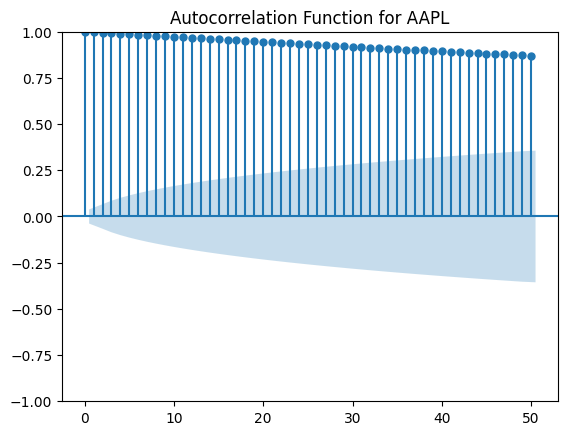

<Figure size 1200x400 with 0 Axes>

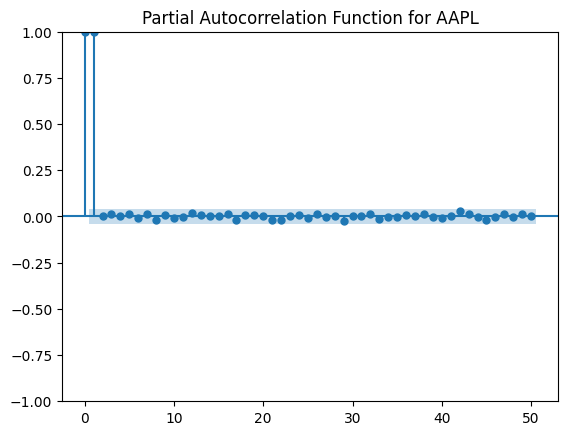

In [45]:
# Plot Autocorrelation and Partial Autocorrelation Functions for AAPL stock
plot_acf_pacf(data_aapl, 'AAPL')

#### Key Observations:
1. From the ACF plot, we can see a sharp drop after the first lag and then a gradual tailing off, which is typical for a non-stationary series.

2. The PACF plot does not show any significant spikes beyond the first few lags, suggesting that an AR model may not be particularly useful for capturing the autocorrelation in this data.

Given these observations, it might be necessary to difference the data to achieve stationarity before a suitable model can be developed for forecasting.

<Figure size 1200x400 with 0 Axes>

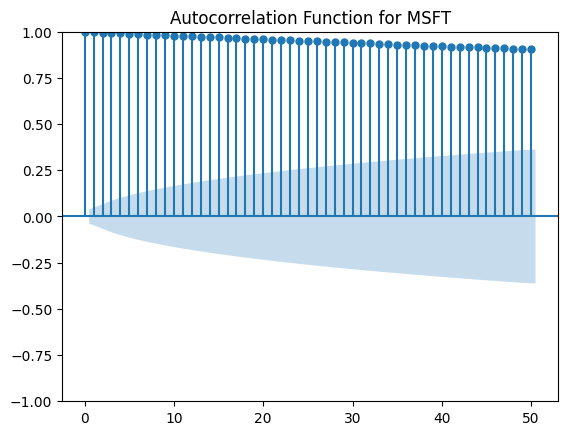

<Figure size 1200x400 with 0 Axes>

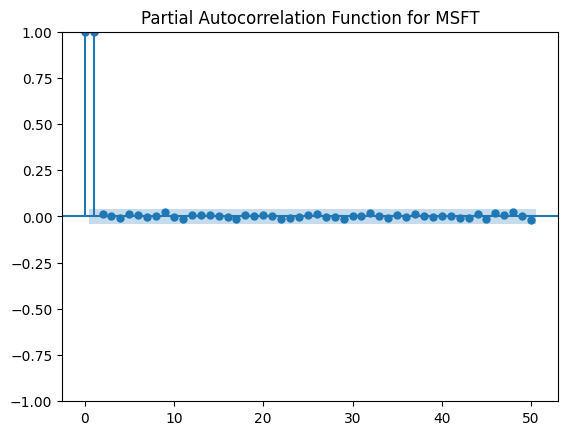

In [46]:
# Plot Autocorrelation and Partial Autocorrelation Functions for MSFT stock
plot_acf_pacf(data_msft, 'MSFT')

#### Key Observations:
1. The significant autocorrelation at initial lags in the ACF plot may indicate a potential AR process. However, the PACF does not show significant partial autocorrelations at higher lags, suggesting that an AR(p) model with p as the highest lag with significant autocorrelation might be appropriate.

2. The strong initial autocorrelation followed by a tapering off may indicate that the series is non-stationary and might need differencing to remove trends or cycles before fitting an ARIMA model.

### Plot the correlation heatmap

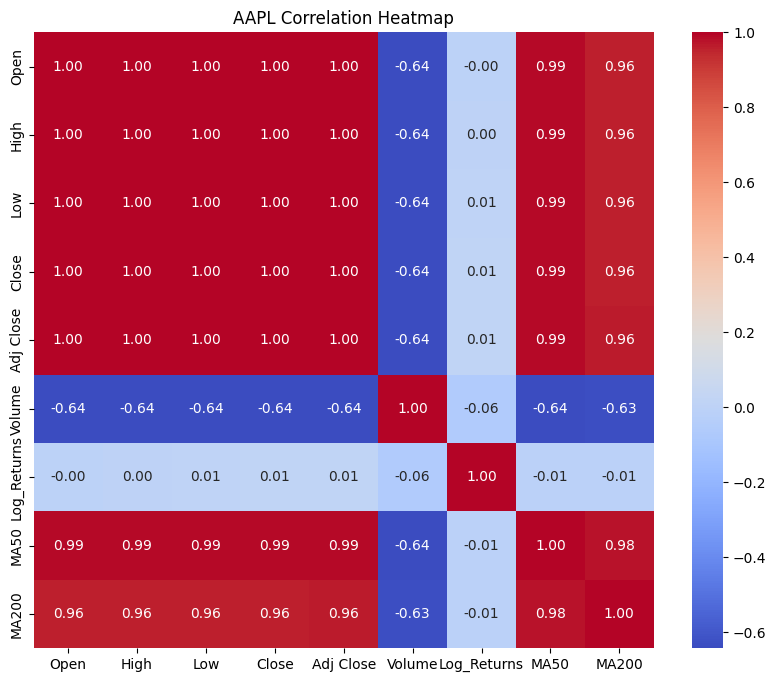

In [47]:
 # Plot correlation heatmap for AAPL stock
 plot_correlation_heatmap(data_aapl, 'AAPL')

#### Key Observations:
1. The 'Open', 'High', 'Low', 'Close', and 'Adj Close' values are perfectly correlated with each other (correlation of 1), which is expected as these prices typically move together throughout the trading day.

2. 'Volume' shows some negative correlation with 'Adj Close' and other price-related variables, which could suggest that on days when the price decreases, the volume of trades increases, or vice versa.

3. The 'Log_Returns' have a slight negative correlation with 'Volume' but are not strongly correlated with the prices themselves, indicating that the daily returns don't have a strong linear relationship with the daily volume or the price levels.

4. The moving averages (MA50 and MA200) are highly correlated with the stock prices, which is typical because they are derived from the prices themselves.

5. The strong positive correlations among the 'Open', 'High', 'Low', 'Close', and 'Adj Close' values indicate that these metrics typically move in the same direction; the negative correlation with 'Volume' might warrant further investigation to understand the trading dynamics. The moving averages are lagging indicators and tend to follow the trend of the stock prices.

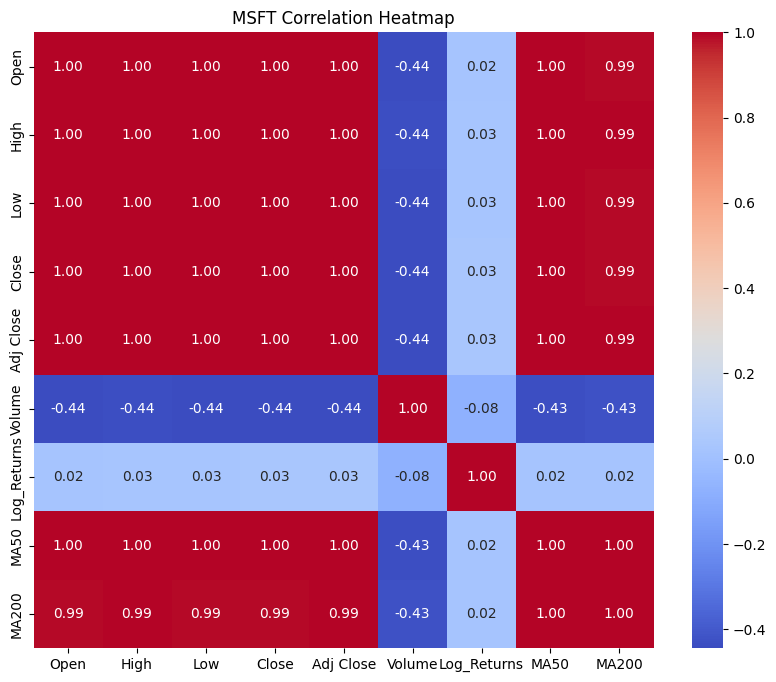

In [48]:
# Plot correlation heatmap for MSFT stock (Microsoft Corporation)
plot_correlation_heatmap(data_msft, 'MSFT')

#### Key Observations:

The correlation coefficients shown in the heatmap provide insight into the linear relationship between each pair of variables. Here are some observations:

1. There is a perfect positive correlation (coefficients of 1) between 'Open', 'High', 'Low', 'Close', and 'Adj Close'. This is expected since these are prices that are generally closely related throughout the trading day.

2. 'Volume' has a slightly negative correlation with most of the price-related variables, which may suggest that higher volumes could be associated with days when the stock price is lower or vice versa. However, this correlation is not very strong (coefficients around -0.44).

3. 'Log_Returns' show very little to no correlation with the price-related variables and 'Volume', which implies that the daily returns are not linearly dependent on the daily prices or the volume of stocks traded.

4. Both 'MA50' and 'MA200' show a very high positive correlation with the price-related variables, which makes sense as these are derived from the stock prices over time.

5. 'Log_Returns' do not show a strong correlation with 'MA50' and 'MA200', indicating that the moving averages do not have a strong linear relationship with daily returns.

In comparison to the AAPL heatmap, the MSFT heatmap shows a weaker negative correlation between 'Volume' and the price-related variables. This could indicate differences in trading behavior or market reactions for these two stocks. The perfect positive correlations among 'Open', 'High', 'Low', 'Close', and 'Adj Close' are consistent across both heatmaps, reflecting the nature of stock prices to move together during the trading day

### Model Evaluation, Performance Comparison, and Future Projection Visualization for AAPL Stock

In [49]:
# List of timestamps to evaluate
timestamps = [30, 60, 90, 120]

# Evaluate models for the specified stocks and timestamps
performance_records, best_timestamps = evaluate_models_with_best_timestamp(['AAPL'], '2009-08-09', '2020-01-01', timestamps)


Evaluating models for AAPL
[*********************100%%**********************]  1 of 1 completed

Processing time step: 30

Training Baseline model with 64 neurons and 0 dropout rate for time stamp 30
Epoch 1/50
29/29 [==============================] - 2s 32ms/step - loss: 0.0390 - mae: 0.1348 - mse: 0.0390 - val_loss: 0.0243 - val_mae: 0.1345 - val_mse: 0.0243
Epoch 2/50
29/29 [==============================] - 0s 8ms/step - loss: 0.0040 - mae: 0.0478 - mse: 0.0040 - val_loss: 0.0072 - val_mae: 0.0689 - val_mse: 0.0072
Epoch 3/50
29/29 [==============================] - 0s 11ms/step - loss: 0.0029 - mae: 0.0402 - mse: 0.0029 - val_loss: 0.0077 - val_mae: 0.0722 - val_mse: 0.0077
Epoch 4/50
29/29 [==============================] - 0s 11ms/step - loss: 0.0025 - mae: 0.0378 - mse: 0.0025 - val_loss: 0.0073 - val_mae: 0.0701 - val_mse: 0.0073
Epoch 5/50
29/29 [==============================] - 0s 13ms/step - loss: 0.0023 - mae: 0.0355 - mse: 0.0023 - val_loss: 0.0076 - val_mae: 0.0717 - v

In [50]:
# Generate DataFrames for MSE and MAE comparisons
mse_comparison_df_aapl, mae_comparison_df_aapl = tabular_comparison(best_timestamps)

# Display the DataFrame for MSE comparisons
display(mse_comparison_df_aapl)

# Display the DataFrame for MAE comparisons
display(mae_comparison_df_aapl)

,Stock,Model,Timestamp,Train MSE,Validation MSE,Test MSE
0,AAPL,Baseline,30,0.012373,0.000834,0.033327
1,AAPL,RNN,60,0.017112,0.001072,0.135770
2,AAPL,LSTM,30,0.013998,0.001115,0.069578


,Stock,Model,Timestamp,Train MAE,Validation MAE,Test MAE
0,AAPL,Baseline,30,0.000290,0.021065,0.001823
1,AAPL,RNN,60,0.000475,0.026329,0.034957
2,AAPL,LSTM,30,0.000356,0.024729,0.007050


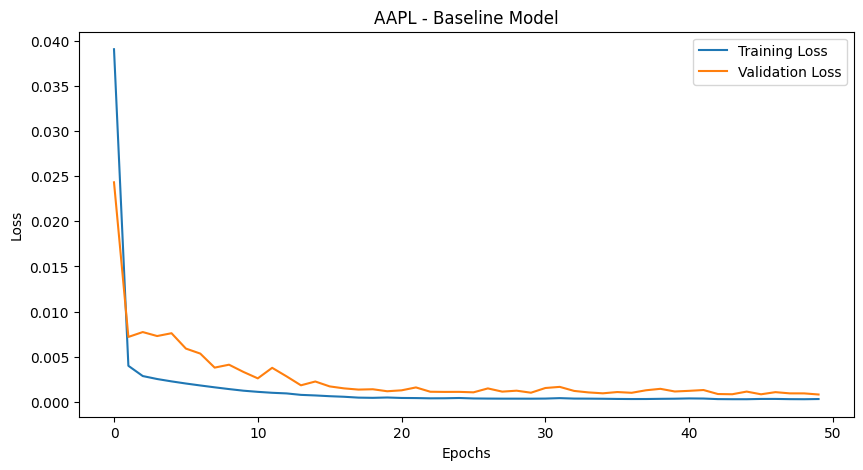

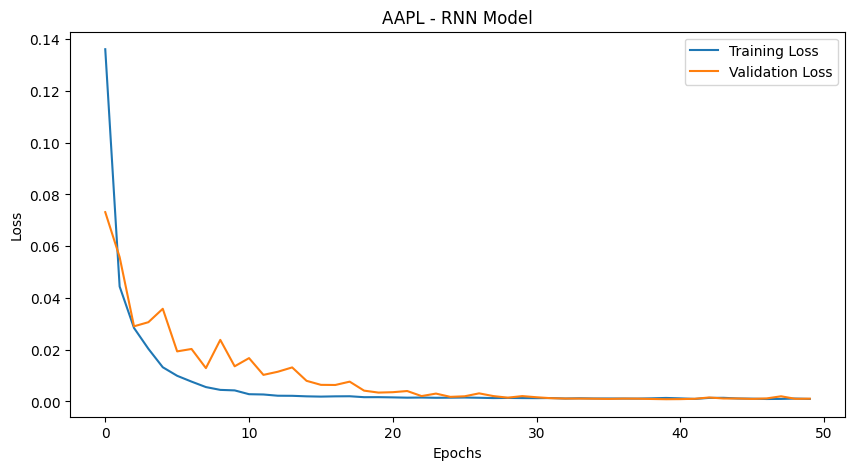

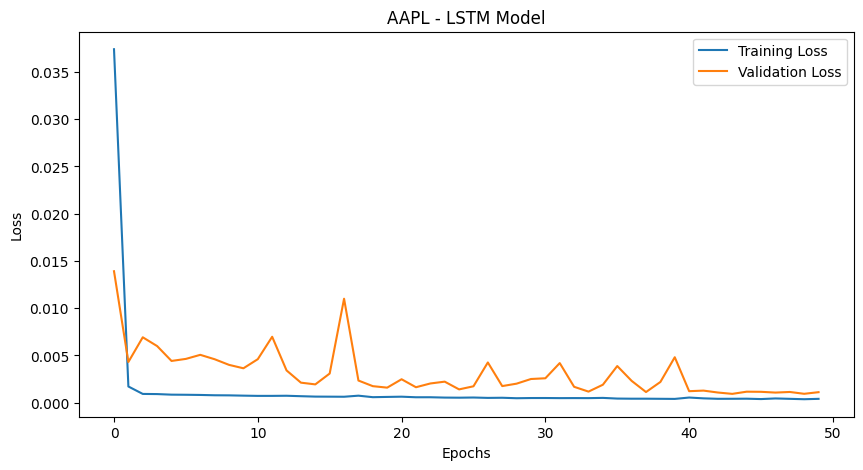

In [51]:
# Iterate over the best_timestamps dictionary to plot loss curves for each stock and model
for (stock, model), details in best_timestamps.items():
    _, _, history, _, _, _, _, _, _, _ = details  # Extract training history
    plot_loss_curves(history, model, f'{stock} - {model} Model')  # Plot loss curves

##### Key Observations for AAPL Baseline Model:
1. Both the training and validation loss decrease sharply in the first few epochs, suggesting that the model is learning and improving its predictions rapidly at the start.

2. After the initial sharp decrease, both losses appear to plateau, indicating that the model has reached a point where further training does not significantly improve its performance on either the training or validation set.

3. The fact that both losses have plateaued and are relatively close to each other suggests that the model is not overfitting. Overfitting would be indicated by the training loss continuing to decrease while the validation loss starts to increase or stops decreasing.

4. The losses are quite low and stable from around epoch 10 onwards, which could either mean the model has converged to a good solution or it has reached its capacity with the current architecture and data.

##### Key Observations for AAPL RNN Model
1. Similar to the baseline model plot, both the training and validation losses decrease sharply in the initial epochs, suggesting that the model is learning quickly at the beginning of the training process.

2. After the initial descent, both curves flatten out, indicating that the model may have reached a point of convergence where additional training does not significantly improve its performance.

3. The training loss is slightly lower than the validation loss throughout the training process, which is common as the model is directly learning from the training data. However, the fact that the validation loss closely follows the training loss suggests good generalization with no apparent signs of overfitting.

4. The final values of loss, particularly the validation loss, are crucial to evaluate the model's performance. The plot does not show these values, so the final performance can't be assessed without additional context.

The scale of the loss on the y-axis is different from the previous plot showed for the baseline model, starting at a higher initial loss value and descending to a similar range as the baseline's loss after 50 epochs. This suggests that the RNN model initially had a higher error rate than the baseline model but improved to a comparable level after training.

##### Key Observations for AAPL LSTM Model

1. Both training and validation loss decrease sharply at the beginning, indicating initial learning.

After the steep initial decline, the training loss levels off, which is typical as the model begins to converge. However, it does show some minor fluctuations which could be indicative of the stochastic nature of the training process or small variations in the learning process.

2. The validation loss has several spikes, which suggest moments where the model's predictions on the validation set have worsened. This could be due to the model learning noise from the training data or certain epochs where the model's parameters have not generalized well.

3. Notably, the validation loss exhibits more variability than the training loss. This can sometimes occur with smaller validation sets or with certain types of data that cause the model to learn less consistently.

4. Despite the spikes, the validation loss also shows a general downward trend, implying some degree of learning and generalization capability in the LSTM model.

5. The scale of the loss is relatively low, but without a benchmark or context for what constitutes a "good" loss value for this particular application, it's difficult to assess the absolute performance of the model.

6. Unlike the previous RNN model, the LSTM shows more fluctuations in validation loss, which might need further investigation. It could be that the model's complexity is capturing more noise, or it might be a sign that hyperparameter tuning is required

1/1 [==============================] - 0s 20ms/step


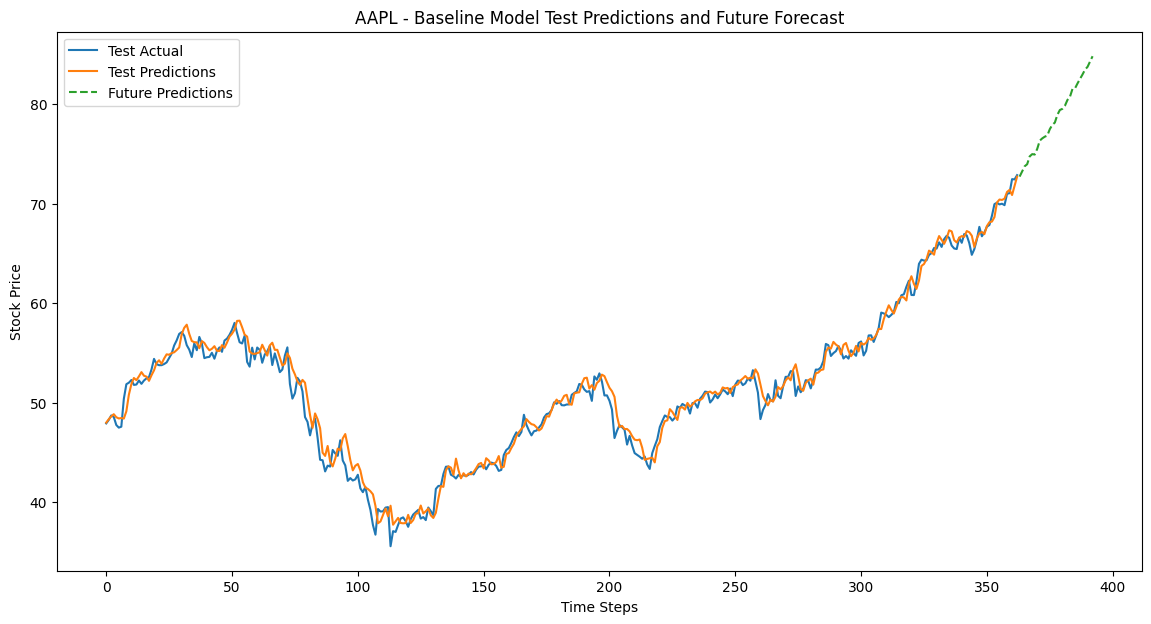

1/1 [==============================] - 0s 22ms/step


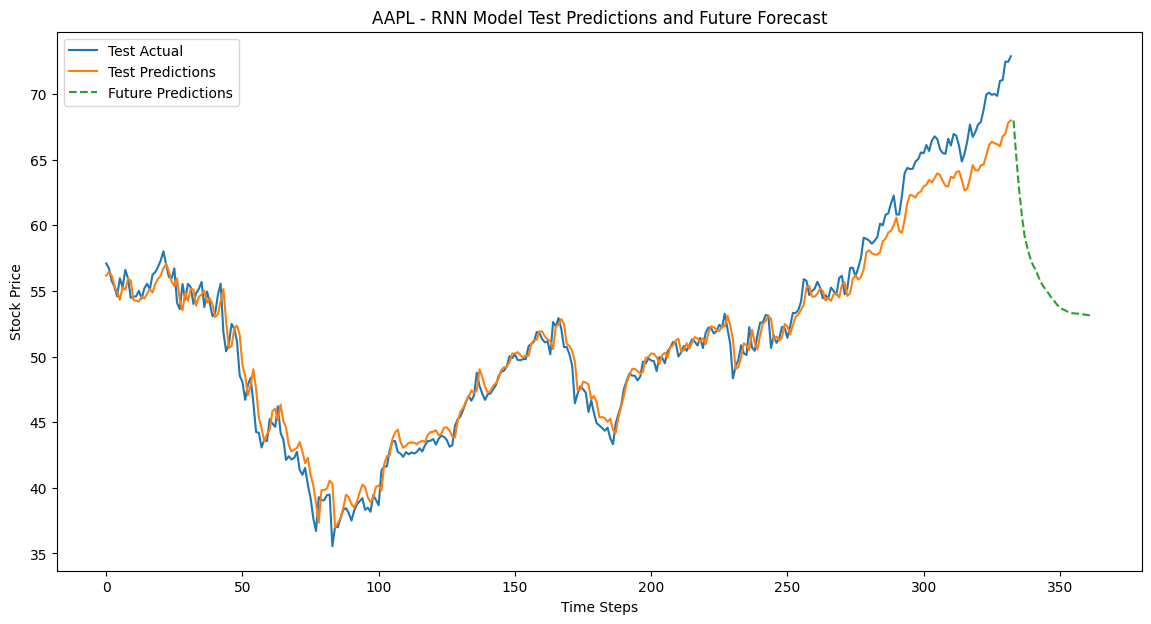

1/1 [==============================] - 0s 23ms/step


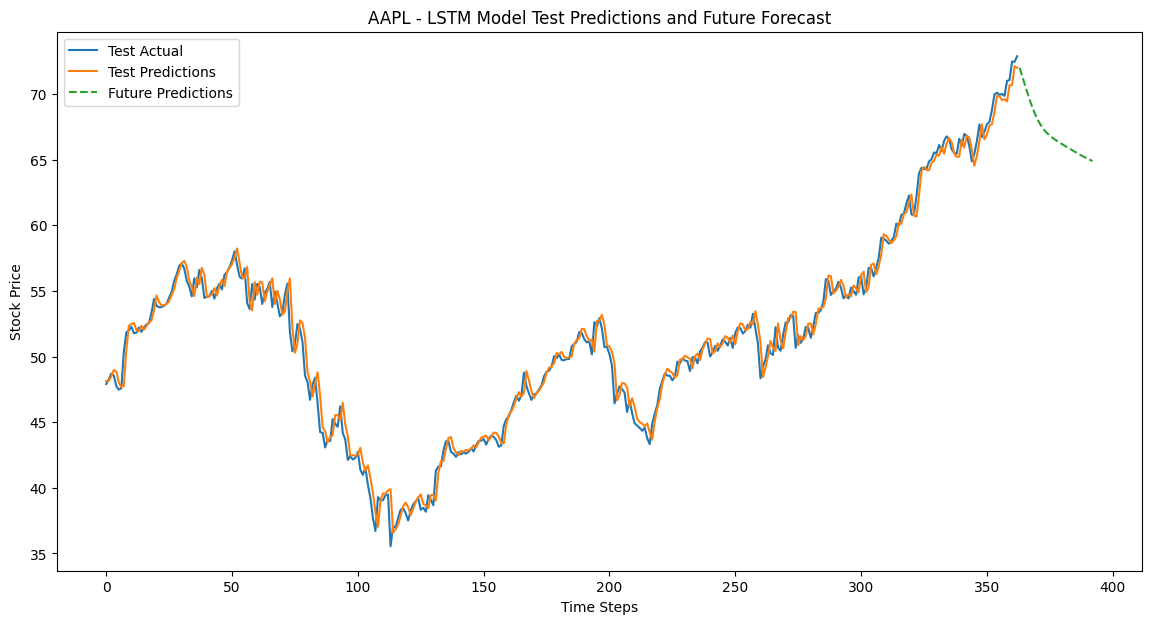

In [52]:
# Iterate over the list of models
for model in ['Baseline', 'RNN', 'LSTM']:
    # Check if the model information for 'AAPL' exists in the best_timestamps dictionary
    if ('AAPL', model) in best_timestamps:
        # Plot test and future predictions for the specified model and 'AAPL' stock
        plot_test_and_future_predictions(best_timestamps, 'AAPL', model, future_steps=30)

#### Model Evaluation, Performance Comparison, and Future Projection Visualization for MSFT Stock

In [53]:
# Evaluate models for the 'MSFT' stock with different timestamps
performance_records, best_timestamps = evaluate_models_with_best_timestamp(['MSFT'], '2009-08-09', '2020-01-01', timestamps)


Evaluating models for MSFT
[*********************100%%**********************]  1 of 1 completed

Processing time step: 30

Training Baseline model with 64 neurons and 0 dropout rate for time stamp 30
Epoch 1/50
29/29 [==============================] - 1s 9ms/step - loss: 0.0080 - mae: 0.0590 - mse: 0.0080 - val_loss: 0.0043 - val_mae: 0.0522 - val_mse: 0.0043
Epoch 2/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0010 - mae: 0.0231 - mse: 0.0010 - val_loss: 0.0028 - val_mae: 0.0422 - val_mse: 0.0028
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 6.6480e-04 - mae: 0.0188 - mse: 6.6480e-04 - val_loss: 0.0023 - val_mae: 0.0372 - val_mse: 0.0023
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 5.6612e-04 - mae: 0.0173 - mse: 5.6612e-04 - val_loss: 0.0015 - val_mae: 0.0286 - val_mse: 0.0015
Epoch 5/50
29/29 [==============================] - 0s 4ms/step - loss: 5.5777e-04 - mae: 0.0171 - mse: 5.5777e-04 - val_loss: 0.0014 -

In [54]:
# Compute and display MSE and MAE comparison DataFrames for the 'MSFT' stock
mse_comparison_df_msft, mae_comparison_df_msft = tabular_comparison(best_timestamps)
display(mse_comparison_df_msft)
display(mae_comparison_df_msft)

,Stock,Model,Timestamp,Train MSE,Validation MSE,Test MSE
0,MSFT,Baseline,60,0.014618,0.001196,0.046319
1,MSFT,RNN,30,0.019887,0.010839,0.556179
2,MSFT,LSTM,60,0.020233,0.006024,0.317678


,Stock,Model,Timestamp,Train MAE,Validation MAE,Test MAE
0,MSFT,Baseline,60,0.000419,0.024931,0.003551
1,MSFT,RNN,30,0.000696,0.074325,0.369423
2,MSFT,LSTM,60,0.000820,0.060372,0.126602


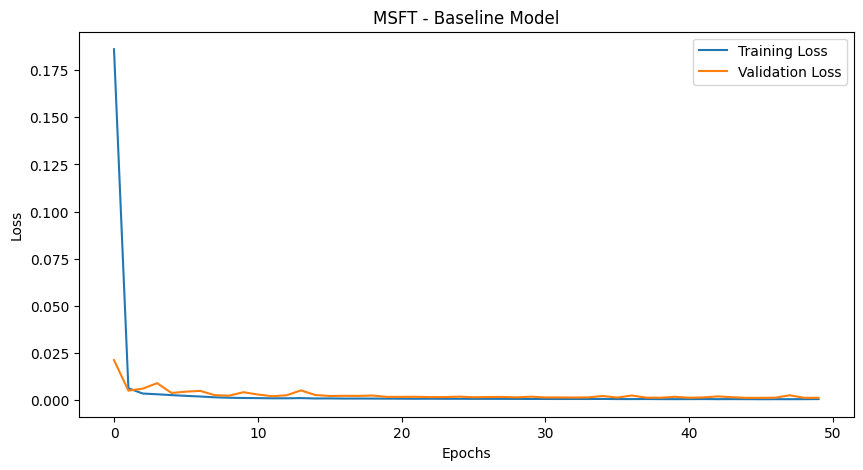

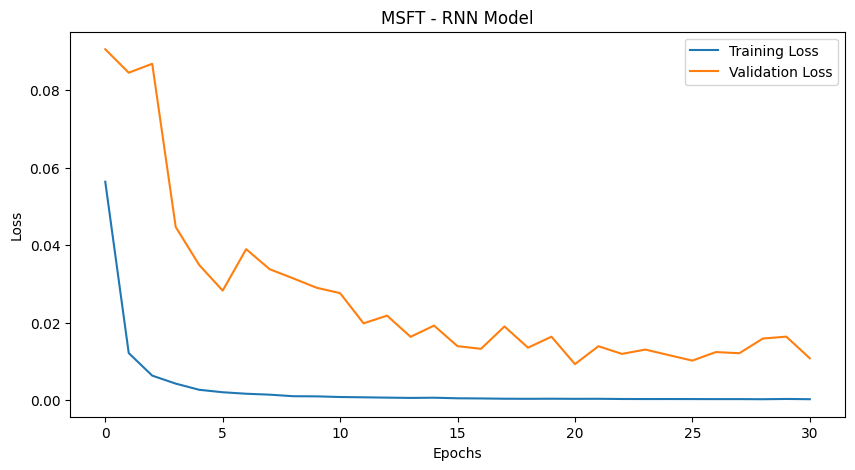

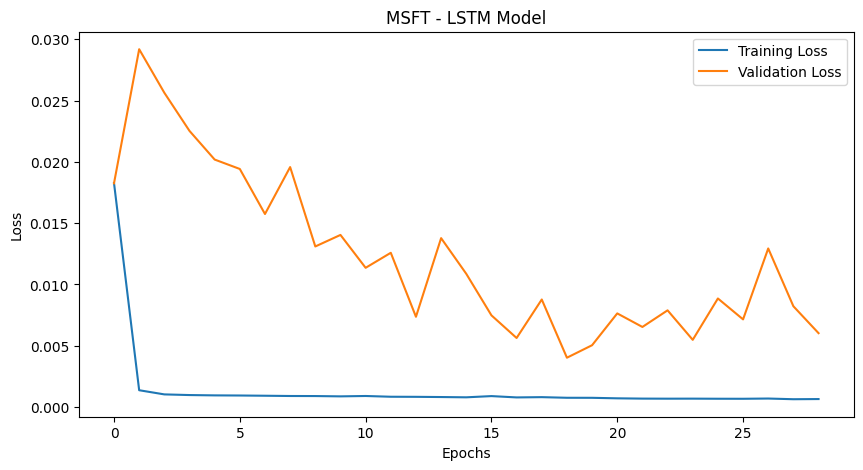

In [55]:
# Iterate over the best_timestamps dictionary to plot loss curves for each stock and model
for (stock, model), details in best_timestamps.items():
    _, _, history, _, _, _, _, _, _, _ = details  # Extract training history
    plot_loss_curves(history, model, f'{stock} - {model} Model')  # Plot loss curves

##### Key Observations for MSFT Baseline Model
1. The model does not appear to be overfitting, as the validation loss is not increasing or diverging from the training loss. Overfitting would be indicated by a significant gap where the training loss continues to decrease while the validation loss increases.

2. Both losses have plateaued after the initial epochs, which might indicate that the model has reached its learning capacity given the current architecture and data. This could suggest that further training would not yield substantial improvements in the model's performance.

3. The close proximity of the validation loss to the training loss throughout the training process suggests that the model has good generalization capabilities.

4. The relatively flat loss curves after the initial drop could also indicate that the model might benefit from more complex features, additional data, or a different model architecture to capture more nuances in the data.

5. The scale of the loss on the y-axis is similar to that of the previous models for AAPL, indicating that the performance of the baseline model on MSFT stock is consistent with the AAPL stock prediction task.

##### Key Observations for MSFT RNN Model
1. After an initial rapid decrease, the training loss levels off, which is a typical behavior indicating that the model is starting to converge and has learned a significant amount from the training data.

2. The validation loss mirrors the initial decrease but then shows more variability compared to the training loss. The fluctuations in the validation loss suggest that the model's performance on the validation set is less stable. This could be due to a number of factors, including overfitting, the model's sensitivity to the specifics of the validation set, or the stochastic nature of the learning algorithm.

3. The gap between the training and validation loss indicates that the model may not generalize as well to unseen data as it does to the training data. This gap can be a sign of overfitting, where the model is learning to fit the noise in the training data rather than capturing the underlying trend.

4. The scale of loss in this graph starts higher than in the baseline model graph for MSFT but decreases to a similar level by around epoch 10. This suggests that the RNN model may have a steeper initial learning curve but eventually performs similarly to the baseline model, at least by epoch 30 as shown.

#### Key Observations for MSFT LSTM Model
1. The initial decrease in both training and validation loss suggests that the LSTM model is capable of learning from the data.

2. The increasing trend and fluctuations in the validation loss towards the later epochs may indicate overfitting, where the model learns patterns specific to the training data that do not generalize well to unseen data.

3. The gap between the training and validation loss towards the end of the training indicates a divergence in performance, with the model performing better on the training data than on the validation data.

4. The overall lower magnitude of loss for both curves compared to earlier models suggests that the LSTM might be more effective for this particular prediction task.

5. Since the model is an LSTM, which is designed to capture long-term dependencies in time-series data, it is possible that the LSTM architecture is better suited to the task of stock price prediction compared to simpler models.

1/1 [==============================] - 0s 20ms/step


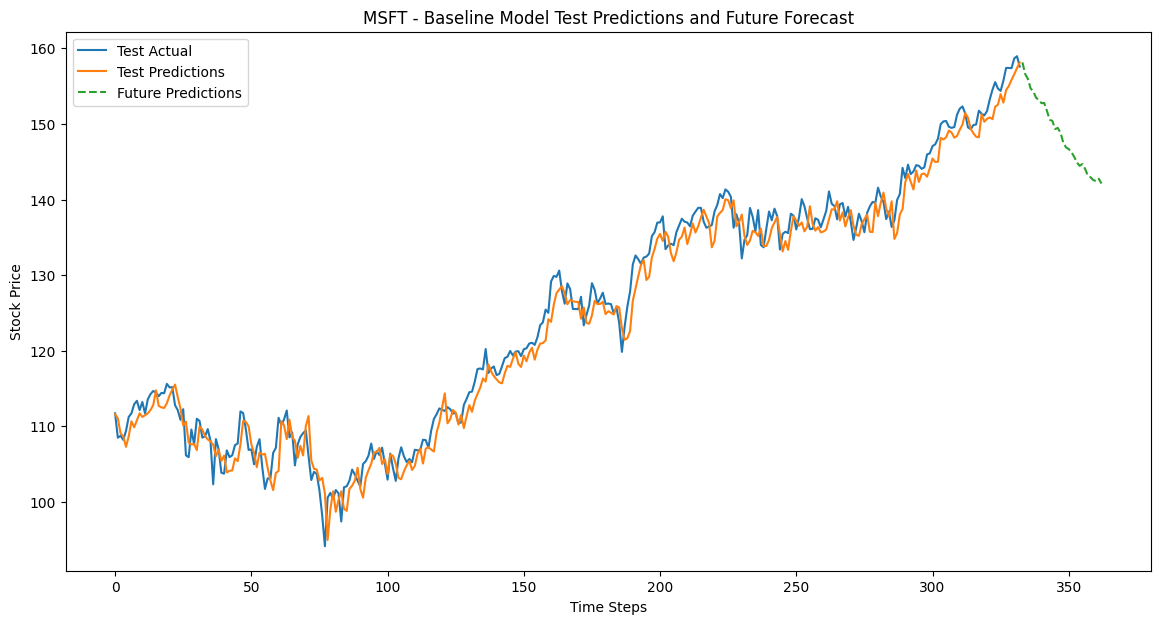

1/1 [==============================] - 0s 23ms/step


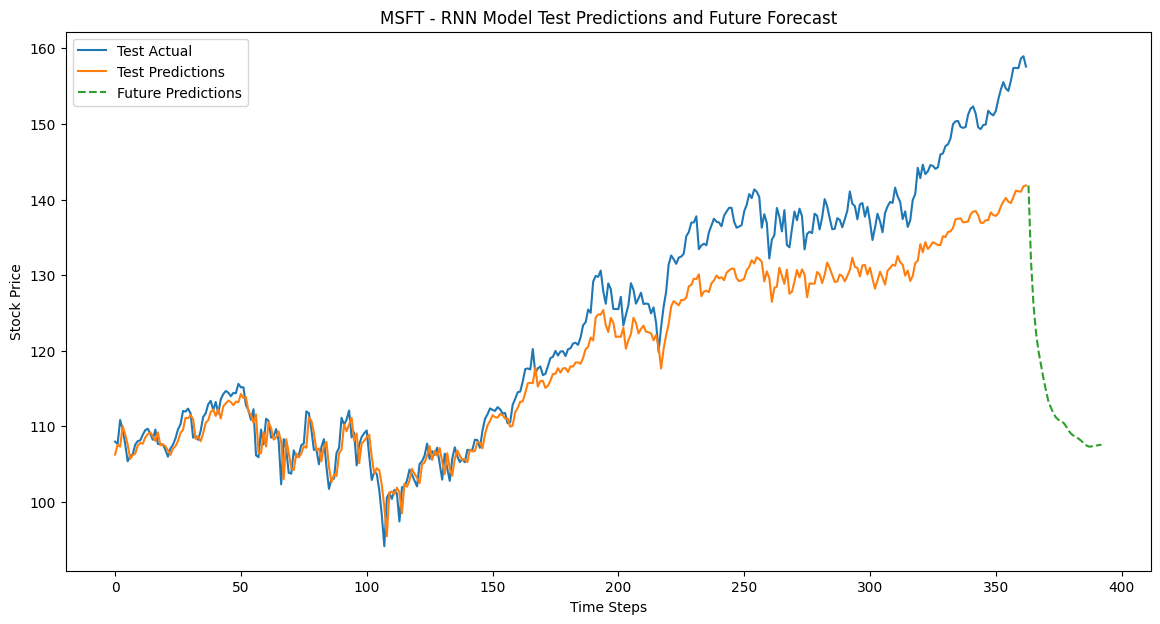

1/1 [==============================] - 0s 41ms/step


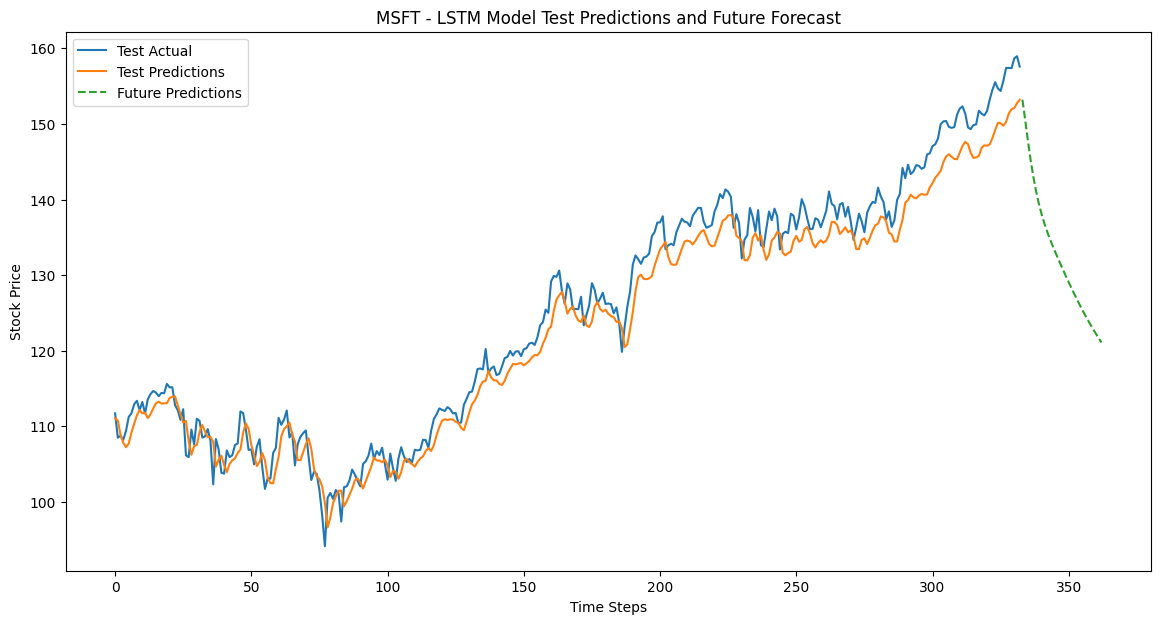

In [56]:
# Iterate over the list of models
for model in ['Baseline', 'RNN', 'LSTM']:
    # Check if there are results for the 'MSFT' stock and the current model in the best_timestamps dictionary
    if ('MSFT', model) in best_timestamps:
        # Plot test and future predictions for the 'MSFT' stock and the current model
        plot_test_and_future_predictions(best_timestamps, 'MSFT', model, future_steps=30)